# Cyclocross results trends 2023-2024 season

In [20]:
import pandas as pd 
import importlib
from io import StringIO
from data_cleaning import join_all
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

events = ['Barnburner at Steilacoom 2023.txt', 'Starcrossed at Marymoor 2023.txt', 'Beach Party At Silver Lake 2023.txt',
'Magnuson Park Cross 2023.txt', 'North 40 at LeMay 2023.txt', 'Woodland Park GP 2023.txt', 'The Beach Party at Silver Lake 2024.txt',
'Starcrossed at Marymoor 2024.txt', 'Barnburner at Steilacoom 2024.txt', 'Magnuson Park Cross 2024.txt', 'North 40 - LeMay 2024.txt',
'Woodland Park Gran Prix 2024.txt']
dates = ['2023-09-10', '2023-09-23', '2023-10-08', '2023-10-22', '2023-11-05', '2023-11-19', '2024-09-08', '2024-09-21', '2024-10-06', '2024-10-20', '2024-11-03', '2024-11-17']


In [21]:
df = join_all(events, dates)

Initializing main data frame based on: Barnburner at Steilacoom 2023.txt
Appending: Barnburner at Steilacoom 2023.txt
Appending: Starcrossed at Marymoor 2023.txt
Appending: Beach Party At Silver Lake 2023.txt
Appending: Magnuson Park Cross 2023.txt
Appending: North 40 at LeMay 2023.txt
Appending: Woodland Park GP 2023.txt
Appending: The Beach Party at Silver Lake 2024.txt
Appending: Starcrossed at Marymoor 2024.txt
Appending: Barnburner at Steilacoom 2024.txt
Appending: Magnuson Park Cross 2024.txt
Appending: North 40 - LeMay 2024.txt
Appending: Woodland Park Gran Prix 2024.txt


### Total number of races raced by gender identity

In [22]:
df
# df.to_csv('results/combined.csv')

df['gender'] = df['gender'].replace(to_replace=['Non-Binary', 'Non-binary'], value='Nonbinary')
df['gender'].value_counts()

gender
Male         5925
Female       1603
Nonbinary     120
Name: count, dtype: int64

about 3.7 as much adult male as adult female participation (num individual races per gender)

In [23]:
competitive_adults_on_normal_bikes = df[~df['category'].isin(['1-2nd Grade Female', '1-2nd Grade Male', '3-5th Grade Female', '3-5th Grade Male', 'Middle School Female', 'Middle School Male', 'Unicycle', 'Tandem'])]


competitive_adults_on_normal_bikes['gender'].value_counts()
df['gender'].value_counts() - competitive_adults_on_normal_bikes['gender'].value_counts()

gender
Male         619
Female       300
Nonbinary      2
Name: count, dtype: int64

### the adults, race participation by gender

<Axes: xlabel='gender'>

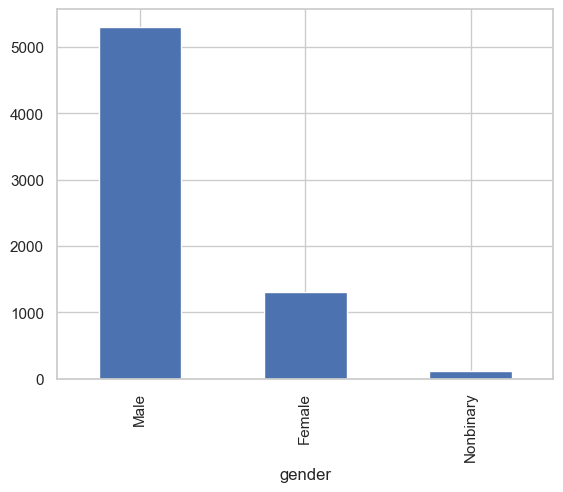

In [24]:
competitive_adults_on_normal_bikes['gender'].value_counts().plot(kind='bar')
# the adults

### the youth, race participation by gender

<Axes: xlabel='gender'>

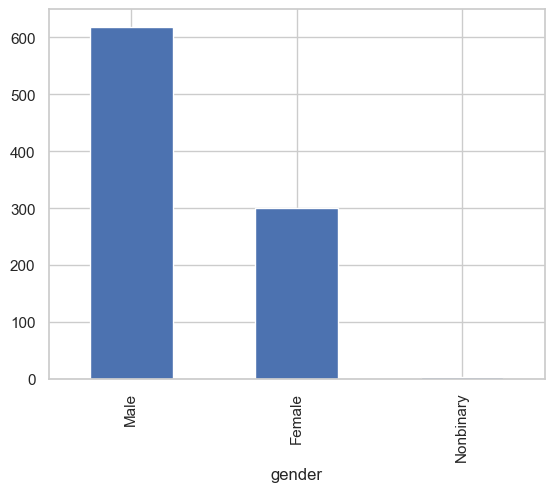

In [25]:
(df['gender'].value_counts() - competitive_adults_on_normal_bikes['gender'].value_counts()).plot(kind='bar')
# the youth

about 2.06x as much male youth as female youth participation (these are both measuring per-race, so individuals can be double counted, but mostly they race one race per event, so it records participation by gender more than distinct numbers of participants by gender)

### Relative to overall field (filtered by gender, ignoring children) how do racers perform over time as they compete more over two seasons?

In [26]:
competitive_adults_on_normal_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6741 entries, 34 to 1076
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype        
---  ------            --------------  -----        
 0   place             6741 non-null   object       
 1   bib               6727 non-null   float64      
 2   name              6727 non-null   object       
 3   team name         4114 non-null   object       
 4   category          6727 non-null   object       
 5   age               6713 non-null   float64      
 6   gender            6727 non-null   object       
 7   time              6727 non-null   object       
 8   lap 1             6641 non-null   float64      
 9   lap 2             6574 non-null   float64      
 10  lap 3             6508 non-null   float64      
 11  lap 4             6416 non-null   float64      
 12  lap 5             6093 non-null   float64      
 13  lap 6             4595 non-null   float64      
 14  lap 7             2058 non-null   float64   

get averages per gender per date

In [27]:
competitive_adults_on_normal_bikes

# groupby date and gender then calculate the average time
average_times = competitive_adults_on_normal_bikes.groupby(['date', 'gender'])['average_lap_time'].mean().reset_index()
average_times.rename(columns={'average_lap_time': 'overall_average_time'}, inplace=True)

# average times into original DataFrame
competitive_adults_on_normal_bikes = competitive_adults_on_normal_bikes.merge(average_times, on=['date', 'gender'], how='left')



# groupby date and gender then calculate the average time
average_times_df = df.groupby(['date', 'gender'])['average_lap_time'].mean().reset_index()
average_times_df.rename(columns={'average_lap_time': 'overall_average_time'}, inplace=True)

# average times into original DataFrame
df = df.merge(average_times_df, on=['date', 'gender'], how='left')

competitive_adults_on_normal_bikes.head(20)

,place,bib,name,team name,category,age,gender,time,lap 1,lap 2,...,laps,team_points,date,average_lap_time,lap 9,lap 10,lap 11,first name,last name,overall_average_time
0,1,838.0,Sarah Evans,NaN,Beginner Female,30.0,Female,1:02:56.5,169.8,717.6,...,6.0,-,2023-09-10,721.340000,NaN,NaN,NaN,NaN,NaN,744.169297
1,2,837.0,Kelsey Dunn,NaN,Beginner Female,28.0,Female,-1 lap,170.5,721.5,...,5.0,-,2023-09-10,737.925000,NaN,NaN,NaN,NaN,NaN,744.169297
2,3,835.0,Jennifer Borshoff,NaN,Beginner Female,30.0,Female,-1 lap,170.1,753.1,...,5.0,-,2023-09-10,763.525000,NaN,NaN,NaN,NaN,NaN,744.169297
3,4,839.0,Katelyn Williams,Booger,Beginner Female,36.0,Female,-1 lap,172.6,810.6,...,5.0,-,2023-09-10,782.450000,NaN,NaN,NaN,NaN,NaN,744.169297
4,5,822.0,Eili Rahnel-Efraim,Spokeswomen Racing,Beginner Female,46.0,Female,-1 lap,172.4,796.2,...,5.0,32,2023-09-10,820.800000,NaN,NaN,NaN,NaN,NaN,744.169297
5,6,836.0,Heather Gebhardt,NaN,Beginner Female,37.0,Female,-1 lap,173.1,846.7,...,5.0,-,2023-09-10,858.350000,NaN,NaN,NaN,NaN,NaN,744.169297
6,7,777.0,Angela Serrano Brummett,Taco Time Northwest Cycling Team,Beginner Female,39.0,Female,-1 lap,174.0,907.4,...,5.0,-,2023-09-10,866.275000,NaN,NaN,NaN,NaN,NaN,744.169297
7,8,834.0,Dorianne Caswell,Spokeswomen Racing,Beginner Female,38.0,Female,-1 lap,173.5,873.4,...,5.0,24,2023-09-10,868.800000,NaN,NaN,NaN,NaN,NaN,744.169297
8,9,776.0,Gallia Painter Mackinnon,NaN,Beginner Female,36.0,Nonbinary,-1 lap,173.6,867.4,...,5.0,-,2023-09-10,904.525000,NaN,NaN,NaN,NaN,NaN,790.159286
9,10,778.0,Susan Fletcher,Montlake Bicycle Shop,Beginner Female,57.0,Female,-1 lap,175.7,905.1,...,5.0,-,2023-09-10,915.775000,NaN,NaN,NaN,NaN,NaN,744.169297


In [28]:
competitive_adults_on_normal_bikes['difference_from_avg'] = competitive_adults_on_normal_bikes['average_lap_time'] - competitive_adults_on_normal_bikes['overall_average_time']
df['difference_from_avg'] = df['average_lap_time'] - df['overall_average_time']


## Graph the results of individual performance over time and perform a linear regression

filter by competitors who have raced 4 more more times
generate trend lines for each valid competitor


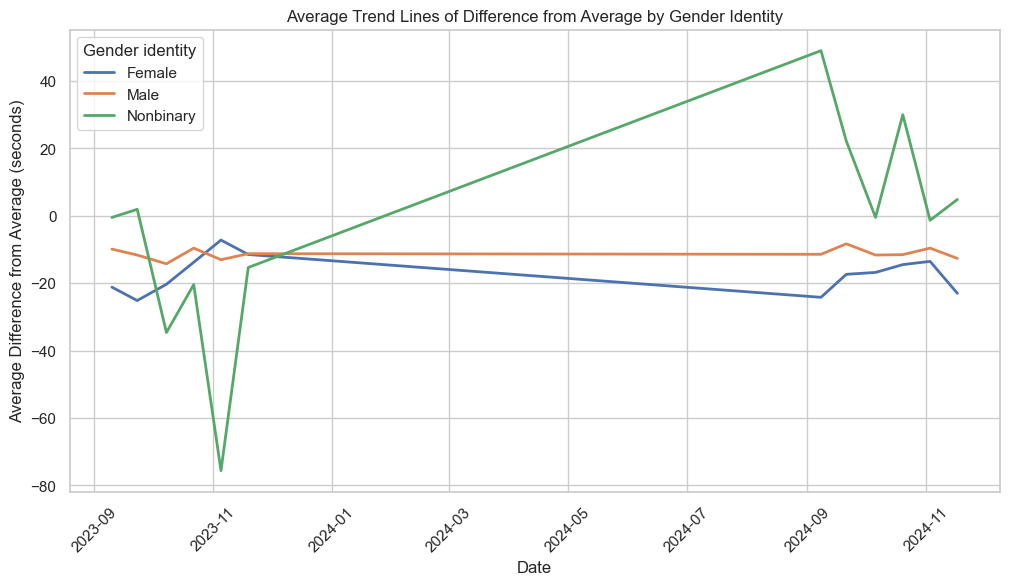

In [29]:
# competitors with more than 3 data points
competitor_counts = competitive_adults_on_normal_bikes['name'].value_counts()
valid_competitors = competitor_counts[competitor_counts >= 4].index
df_filtered_valid = competitive_adults_on_normal_bikes[competitive_adults_on_normal_bikes['name'].isin(valid_competitors)]


# trend lines
def trends(df):
    trendlines = []

    for name, group in df.groupby('name'):
        # remove NA to avoid regression errors
        group = group.dropna(subset=['difference_from_avg'])

        # skip if there are fewer than 4 valid data points after NaN removal (per individual) -- some didn't finish etc.
        if len(group) < 4:
            continue

        # slices out the relevant dates for use, assigns y to diff from avg trends
        x = (group['date'] - group['date'].min()).dt.days.values.reshape(-1, 1) 
        y = group['difference_from_avg'].values

        # linear regression model
        model = LinearRegression().fit(x, y)

        # trend line values
        predicted = model.predict(x)

        # store trends
        trendlines.append(pd.DataFrame({'name': name, 'gender': group['gender'].iloc[0], 'date': group['date'], 'trend': predicted}))

    # Concatenate all trend lines into a single DataFrame
    return pd.concat(trendlines, ignore_index=True)

# trends for valid competitors
trends_df = trends(df_filtered_valid)

# average trend lines by gender

avg_trend = trends_df.groupby(['gender', 'date']).trend.mean().reset_index()

# graph average trend lines by gender
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_trend, x='date', y='trend', hue='gender', linewidth=2)

plt.title('Average Trend Lines of Difference from Average by Gender Identity')
plt.xlabel('Date')
plt.ylabel('Average Difference from Average (seconds)')
plt.grid(True)
plt.xticks(rotation=45)

plt.legend(title='Gender identity')

plt.show()



Insights

those who competed in 4 or more races were consistently faster than the average. In 2023, those who raced more than 4 times and identified as non binary, were between faster, and WAY faster than average
In 2024
 A decrease on this graph indicates that on average the trend was faster

Due to how the data was prepared, there are some unexpected results. Rather than capturing increase in performance race-over-race, it captured the field composition. In 2023, female racers who raced in 4 or more races, on average, became less ahead of the pack each race. ie, female racers who raced in earlier races, were overall faster than average (potentially due to more new racers in early races), with later races indicating that those with 4 or more races under their belt are on average slower.

In 2024, engaged female racers who raced in 4 or more races, on average, became more ahead of the pack by the last race, this tracks, as 2023 data ends up not capturing fully the picture, and those who only raced once in 2023, but 3x in 2024, were still included as a data point, and dragged the average down (or up). Experienced female racers dominate the field earlier in the season, but by the middle, new racers are showing up and reducing average times.

Interestingly, engaged male racers show a much less significant increase in lead from the average relative to female racers for 2024. 

The pattern of female racers who race in the earlier races in the season being overall more ahead of the pack continues in 2024, with the distance from the pack decreasing until the final race of the year, when those who had raced 4 or more times over 2 years demonstrated huge growth.
Nonbinary racers with 4 or more races total performed on average worse than average, this could be due to certain athletes pulling the average lap time way down.

Male racers show a more consistent trend, with a small decrease in distance from the average over the season, and surprisingly consistent results between seasons.

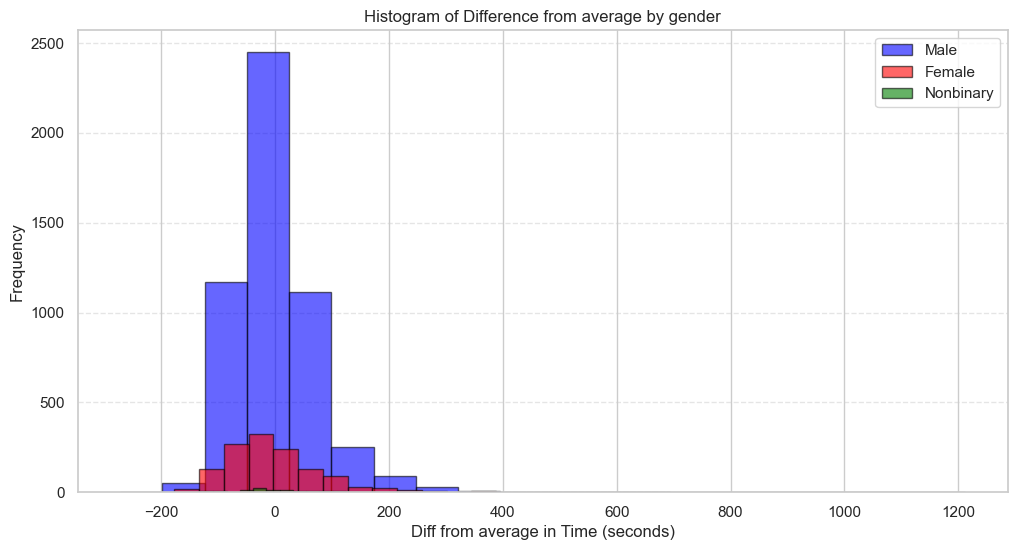

In [30]:

sns.set_theme(style="whitegrid")

men_times = competitive_adults_on_normal_bikes[competitive_adults_on_normal_bikes['gender'] == 'Male']['difference_from_avg']
women_times = competitive_adults_on_normal_bikes[competitive_adults_on_normal_bikes['gender'] == 'Female']['difference_from_avg']
nonbinary_times = competitive_adults_on_normal_bikes[competitive_adults_on_normal_bikes['gender'] == 'Nonbinary']['difference_from_avg']

fig, ax = plt.subplots(figsize=(12, 6))

bins = 20 

# Plot male histogram
ax.hist(men_times, bins=bins, color='blue', alpha=0.6, label='Male', edgecolor='black')

# Plot female histogram
ax.hist(women_times, bins=bins, color='red', alpha=0.6, label='Female', edgecolor='black')

ax.hist(nonbinary_times, bins=bins, color='green', alpha=0.6, label='Nonbinary', edgecolor='black')

# Labels and title
plt.title('Histogram of Difference from average by gender')
plt.xlabel('Diff from average in Time (seconds)')
plt.ylabel('Frequency')
plt.legend()

# Grid and formatting
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Field for female racers is more normally distributed than for male, a LOT of average men, wider field for women and nonbinary.
Both exhibit a long tailed distribution, with a select few pulling down the average dramatically, and a substantial number performing above (slower than) average and leading to a wider distribution of racers with a positive difference relative to average lap time.

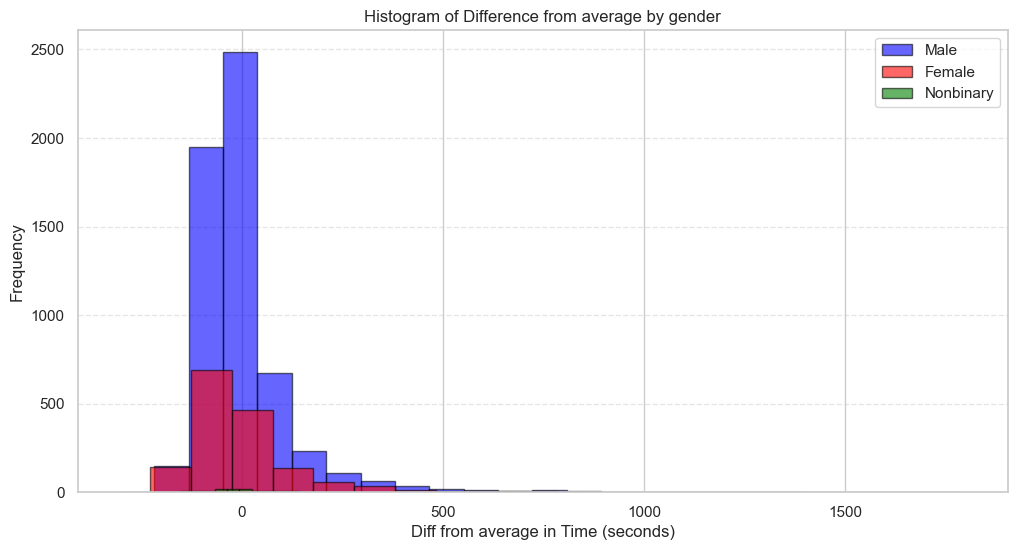

In [31]:

sns.set_theme(style="whitegrid")

men_times = df[df['gender'] == 'Male']['difference_from_avg']
women_times = df[df['gender'] == 'Female']['difference_from_avg']
nonbinary_times = df[df['gender'] == 'Nonbinary']['difference_from_avg']

fig, ax = plt.subplots(figsize=(12, 6))

bins = 20 

# Plot male histogram
ax.hist(men_times, bins=bins, color='blue', alpha=0.6, label='Male', edgecolor='black')

# Plot female histogram
ax.hist(women_times, bins=bins, color='red', alpha=0.6, label='Female', edgecolor='black')

ax.hist(nonbinary_times, bins=bins, color='green', alpha=0.6, label='Nonbinary', edgecolor='black')

# Labels and title
plt.title('Histogram of Difference from average by gender')
plt.xlabel('Diff from average in Time (seconds)')
plt.ylabel('Frequency')
plt.legend()

# Grid and formatting
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Distribution of children competing

Which may more accurately reflect athletic ability without being influenced by other factors? How does the economic background of households of children competing compare to economic background of households of adults competing. Children have a similar distribution when normalized for average lap time by gender. Potential compounding factors for adult participants are economic etc, ability to practice, cost of bike/ performance gap etc, which could result in more varied distributions between demographics. Canada recently put a cap on bike cost for junior Time Trial racing, there was an existing cap for road. Potentially indicating a trend, and potential for F1 style budget constraints on team bikes, as certain set ups become prohibitively expensive, and gear has a more significant impact on results. (Still standard that gear be available for sale, but sometimes it is just a gesture).